# Outline<a class="anchor" id="outline"></a>
   [1. Background](#background)<br>
   
   [2. Data Section](#data)<br>
   - [Step 1: Import Package Dependencies](#package)<br>
   - [Step 2: Import Data](#import)<br>
   - [Step 3:Train/Test Split](#split)<br>
  
   [3. Classification Modeling](#model)
   - [SVM](#SVM)
   - [Logistic Model](#logistic)
   - [Pick a "winning" model](#pick)
   - [Careful evaluation of winning model performance measures](#evaluate)

# Background<a class="anchor" id="background">
[Go to Top](#outline)

**Target Variable:** task_completed

**Background:**
HR department provides a lsit of employees informations, which contains 1)employee experience, 2)training level 4, 3)training level 6, 4)training level 8. They are trying to use machine learning methods to predict whether the employers can complete the task by analyzing these four columns. As a result, HR can make better decisions about team assignments.  

# Data Section<a class="anchor" id="data">
[Go to Top](#outline)
> **Step 1:** Import Package Dependencies
    
> **Step 2:** Import Data
    
> **Step 3:** Train/Test Split

## Step 1: Import Package Dependencies<a class="anchor" id="package">

In [199]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

## Step 2: Import data<a class="anchor" id="import">

In [200]:
df = pd.read_csv("SystemAdministrators.csv")

In [201]:
df.head()

,task_completed,employee_experience,training_level4,training_level6,training_level8
0,1,10.9,1,0,0
1,1,9.9,1,0,0
2,1,10.4,0,1,0
3,1,13.7,0,1,0
4,1,9.4,0,0,1


In [202]:
df.columns

Index(['task_completed', 'employee_experience', 'training_level4',
       'training_level6', 'training_level8'],
      dtype='object')

## Step 3: Train/Test Split<a class="anchor" id="split">

In [203]:
X = df.drop(columns=['task_completed'])
y = df['task_completed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Classification Modeling<a class="anchor" id="model">
[Go to Top](#outline)
### SVM
- **Step 1:** Find the best C value<br>
- **Step 2:** Train the final SVM model<br>
- **Step 3:** Table of Performance Measures<br>
    
    
### Logistic Model
- **Step 1:** Train a Logistic model
- **Step 2:** Table of Performance Measures

### Pick a "winning" model

### Careful evaluation of winning model performance measures

## SVM<a class="anchor" id="SVM">

### Step 1: Find the best C value

In [204]:
# Define the range of C values to be tested
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
f1_scores_class1 = []

# Loop over each value of C to train the SVM model and evaluate performance
for C in C_values:
    svm_model_loop = SVC(C=C, kernel='poly')
    svm_model_loop.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred_train_loop = svm_model_loop.predict(X_train)
    y_pred_test_loop = svm_model_loop.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_pred_train_loop))
    test_accuracies.append(accuracy_score(y_test, y_pred_test_loop))
    f1_scores_class1.append(f1_score(y_test, y_pred_test_loop, pos_label=1))

# Compile results into a DataFrame for better visualization
results_df = pd.DataFrame({
    'C_value': C_values,
    'Train_Accuracy': train_accuracies,
    'Test_Accuracy': test_accuracies,
    'F1_Score_Class1': f1_scores_class1
})

results_df

,C_value,Train_Accuracy,Test_Accuracy,F1_Score_Class1
0,0.0001,0.750000,0.913043,0.000000
1,0.0010,0.750000,0.913043,0.000000
2,0.0100,0.846154,0.869565,0.000000
3,0.1000,0.923077,0.869565,0.400000
4,1.0000,0.923077,0.869565,0.400000
5,10.0000,0.923077,0.869565,0.400000
6,100.0000,0.923077,0.913043,0.666667
7,1000.0000,0.923077,0.913043,0.666667
8,10000.0000,0.923077,0.913043,0.666667


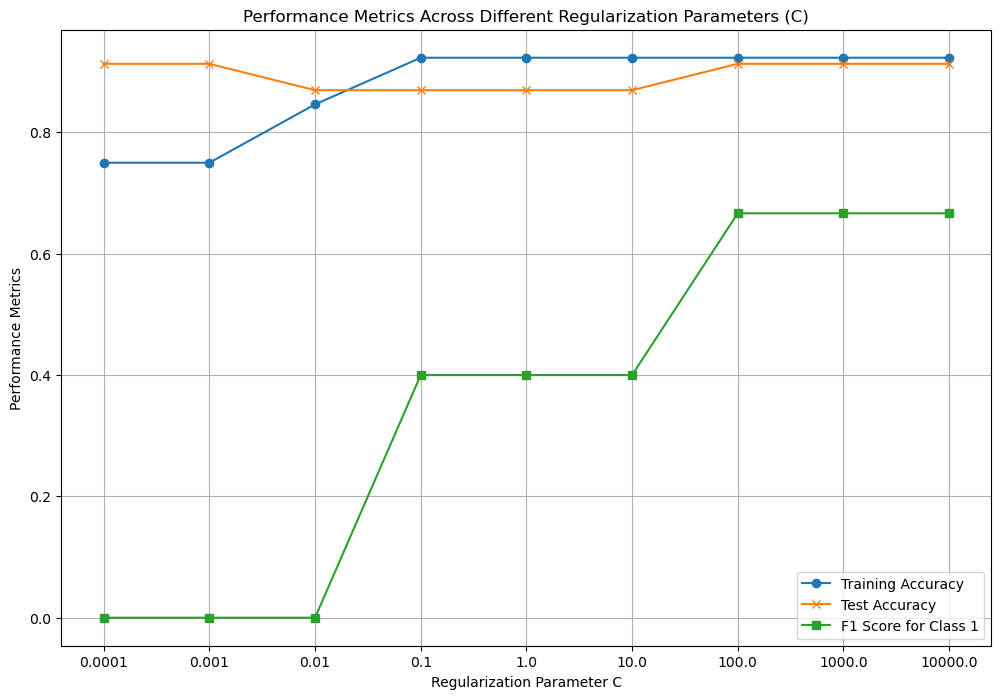

In [205]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Plotting the metrics
plt.plot(results_df['C_value'], results_df['Train_Accuracy'], marker='o', label='Training Accuracy')
plt.plot(results_df['C_value'], results_df['Test_Accuracy'], marker='x', label='Test Accuracy')
plt.plot(results_df['C_value'], results_df['F1_Score_Class1'], marker='s', label='F1 Score for Class 1')

# Annotate the plot
plt.xlabel('Regularization Parameter C')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics Across Different Regularization Parameters (C)')
plt.xscale('log')
plt.xticks(results_df['C_value'], labels=results_df['C_value'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### **Conclusion:** 
Regard '100' as the best C value because the model has the highest performance when C value = 100.

## Step 2: Train the final SVM model

In [206]:
c_value = 100

# Initialize and train the SVM model and a polynomial kernel
svm_model_poly = SVC(C=c_value, kernel='poly')
svm_model_poly.fit(X_train, y_train)

SVC(C=100, kernel='poly')

## Step 3: Table of Performance Measures

In [237]:
svm_model_poly = SVC(C=100, kernel='poly')
svm_model_poly.fit(X_train, y_train)

# Predictions and evaluation
y_pred_train_poly = svm_model_poly.predict(X_train)
y_pred_test_poly = svm_model_poly.predict(X_test)

train_accuracies = accuracy_score(y_train, y_pred_train_poly)
test_accuracies = accuracy_score(y_test, y_pred_test_poly)
f1_scores_class1 = f1_score(y_test, y_pred_test_poly, pos_label=1)

print(f"""
    Train_Accuracy: {train_accuracies},
    Test_Accuracy: {test_accuracies},
    F1_Score_Class1: {f1_scores_class1}""")


    Train_Accuracy: 0.9230769230769231,
    Test_Accuracy: 0.9130434782608695,
    F1_Score_Class1: 0.6666666666666666


## Logistic Model<a class="anchor" id="logistic">

## Step 1: Train a Logistic model

In [238]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

## Step 2: Tabel of Performance Measures

In [239]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy of Logistic Model: {accuracy}")
print(" ")
print(classification_rep)

Accuracy of Logistic Model: 0.9130434782608695
 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.50      1.00      0.67         2

    accuracy                           0.91        23
   macro avg       0.75      0.95      0.81        23
weighted avg       0.96      0.91      0.93        23



## Pick a "winning" model<a class="anchor" id="pick">
> Based on the various performance measures, decide which of the two modeling frameworks (SVM or Logistic) to move forward with. 

In my opinion, **Logistic Regression model** has better performance because the f1 score of Logistic Regression is about 0.91, but the f1 score of SVM is about 0.66. As a result, I prefer the model of Logistic Regression.

## Careful evaluation of winning model performance measures<a class="anchor" id="evaluate">

### Probability Threshold

In [240]:
# Replace these with your actual predicted probabilities and true labels
predicted_probabilities = y_pred_test_poly
true_labels = y_test

# Define the range of probability thresholds
thresholds = np.arange(0, 1.01, 0.05)

# Initialize an empty DataFrame to store performance metrics
performance_df = pd.DataFrame(columns=['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy'])

# Iterate over each probability threshold, calculate performance metrics, and append to the DataFrame
for threshold in thresholds:
    # Convert predicted probabilities to binary predictions using the probability threshold
    binary_predictions = (predicted_probabilities >= threshold).astype(int)
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, binary_predictions)
    
    # Extract TP, TN, FP, FN from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate other performance metrics
    precision = precision_score(true_labels, binary_predictions)
    recall = recall_score(true_labels, binary_predictions)
    f1 = f1_score(true_labels, binary_predictions)
    accuracy = accuracy_score(true_labels, binary_predictions)
    
    # Append a new row to the DataFrame
    performance_df = performance_df.append({
        'Threshold': threshold,
        'TN': tn,
        'TP': tp,
        'FN': fn,
        'FP': fp,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Accuracy': accuracy
    }, ignore_index=True)


In [236]:
performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.00,0.0,2.0,0.0,21.0,0.086957,1.0,0.160000,0.086957
1,0.05,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043
2,0.10,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043
3,0.15,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043
4,0.20,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043
5,0.25,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043
6,0.30,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043
7,0.35,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043
8,0.40,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043
9,0.45,19.0,2.0,0.0,2.0,0.500000,1.0,0.666667,0.913043


### Result 1: Threshold = 0.2

In [212]:
threshold_value = 0.2
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0.2
There is/are 2.0 false positive.
There is/are 0.0 false negaive.


### False Positive

- Meaning:<br>

> In the group of employers who actually cannot complete the task, there are 2 employers are predicted complete the task.

- Potential costs to the business<br>

> For this company, this error could potentially lead to an **overestimation of employee productivity**.<br>
In **marketing**, it may result in the recruitment of an excessive number of customers, thereby reducing customer satisfaction.<br>
In **human resources**, it might lead to an overestimation of employee performance and consequently result in overpaying.

### False Negative
- Meaning<br>
> In the group of employers who actually complete the task, nobody is predicted cannot complete the task.
- Potential costs to the business<br>
> For this company, this error could potentially **impact the overall employee morale**. Misinterpreting employees who have completed tasks as not having done so is very likely to affect the mood and morale of the employees.

### More costly prediction mistakes
- In my opinion, **false positive may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market, and in severe cases, it might necessitate the payment of compensation costs.

### Result 2: Threshold = 0.25

In [213]:
threshold_value = 0.25
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0.25
There is/are 2.0 false positive.
There is/are 0.0 false negaive.


### False Positive

- Meaning:<br>

> In the group of employers who actually cannot complete the task, there are 2 employers are predicted complete the task.

- Potential costs to the business<br>

> For this company, this error could potentially lead to an **overestimation of employee productivity**.<br>
In **marketing**, it may result in the recruitment of an excessive number of customers, thereby reducing customer satisfaction.<br>
In **human resources**, it might lead to an overestimation of employee performance and consequently result in overpaying.

### False Negative
- Meaning<br>
> In the group of employers who actually complete the task, nobody is predicted cannot complete the task.
- Potential costs to the business<br>
> For this company, this error could potentially **impact the overall employee morale**. Misinterpreting employees who have completed tasks as not having done so is very likely to affect the mood and morale of the employees.

### More costly prediction mistakes
- In my opinion, **false positive may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market, and in severe cases, it might necessitate the payment of compensation costs.

### Result 3: Threshold = 0.4

In [214]:
threshold_value = 0.4
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0.4
There is/are 2.0 false positive.
There is/are 0.0 false negaive.


### False Positive

- Meaning:<br>

> In the group of employers who actually cannot complete the task, there are 2 employers are predicted complete the task.

- Potential costs to the business<br>

> For this company, this error could potentially lead to an **overestimation of employee productivity**.<br>
In **marketing**, it may result in the recruitment of an excessive number of customers, thereby reducing customer satisfaction.<br>
In **human resources**, it might lead to an overestimation of employee performance and consequently result in overpaying.

### False Negative
- Meaning<br>
> In the group of employers who actually complete the task, nobody is predicted cannot complete the task.
- Potential costs to the business<br>
> For this company, this error could potentially **impact the overall employee morale**. Misinterpreting employees who have completed tasks as not having done so is very likely to affect the mood and morale of the employees.

### More costly prediction mistakes
- In my opinion, **false positive may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market, and in severe cases, it might necessitate the payment of compensation costs.

## Recommend Probability Threshold
- In this case, I reccomend the probability threshold ≥ 0.05 because the performance which are bigger than 0.05 are the same.